# IA Project Navidad: Spotify Genre Prediction

## 1. Introducción

Columnas principales:

- **track**: Nombre de la canción.
- **artist**: Artista de la canción.
- **uri**: Identificador de recurso de la canción.
- **danceability**: Qué tan bailable es la canción (0.0 a 1.0).
- **energy**: Medida de intensidad y actividad de la canción.
- **key**: Tono de la canción.
- **loudness**: Nivel de volumen promedio.
- **mode**: Modalidad de la canción (0 = menor, 1 = mayor).
- **speechiness**: Medida de palabras habladas en la pista.
- **acousticness**: Confianza de que la canción sea acústica.
- **instrumentalness**: Si la canción tiene voz o no.
- **liveness**: Presencia de audiencia en la grabación.
- **valence**: Positividad transmitida por la canción.
- **tempo**: Velocidad de la canción en BPM.
- **duration_ms**: Duración de la pista en milisegundos.
- **chorus_hit**: Mejor estimación del inicio del estribillo.
- **sections**: Número de secciones en la canción.

Columnas adicionales:

- **type**: 
- **id**: 
- **track_href**: 
- **analysis_url**: 
- **time_signature**: 
- **genre**: 
- **song_name**: 
- **Unnamed: 0**: 
- **title**: 
- **Id**:

Etiqueta a predecir (**genre**), tipo de música:

- Dark Trap: 0
- Underground Rap: 1
- Trap Metal: 2
- Emo: 3
- Rap: 4
- RnB: 5
- Pop: 6
- Hiphop: 7
- techhouse: 8
- techno: 9
- trance: 10
- psytrance: 11
- trap: 12
- dnb: 13
- hardstyle: 14


## 2. Análisis Exploratorio de Datos (EDA)

- Importar librerías

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

- Descripción de las características del conjunto de datos

In [3]:
df = pd.read_csv('train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33844 entries, 0 to 33843
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      33844 non-null  float64
 1   energy            33844 non-null  float64
 2   key               33844 non-null  int64  
 3   loudness          33844 non-null  float64
 4   mode              33844 non-null  int64  
 5   speechiness       33844 non-null  float64
 6   acousticness      33844 non-null  float64
 7   instrumentalness  33844 non-null  float64
 8   liveness          33844 non-null  float64
 9   valence           33844 non-null  float64
 10  tempo             33844 non-null  float64
 11  type              33844 non-null  object 
 12  id                33844 non-null  object 
 13  uri               33844 non-null  object 
 14  track_href        33844 non-null  object 
 15  analysis_url      33844 non-null  object 
 16  duration_ms       33844 non-null  int64 

In [4]:
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title,Id
0,0.896,0.691,1,-7.403,1,0.369,0.01180,0.000,0.0883,0.6650,...,spotify:track:1lKQIxQDnLKoFhNWwMFiho,https://api.spotify.com/v1/tracks/1lKQIxQDnLKo...,https://api.spotify.com/v1/audio-analysis/1lKQ...,152398,4,Underground Rap,First Day Out,NaN,NaN,6863
1,0.432,0.962,2,-5.834,1,0.130,0.00193,0.162,0.6300,0.1240,...,spotify:track:6xyHjM4VecIRZDUldiiBA5,https://api.spotify.com/v1/tracks/6xyHjM4VecIR...,https://api.spotify.com/v1/audio-analysis/6xyH...,219085,4,trance,NaN,8997.0,Uplifting | Trance,30452
2,0.686,0.692,0,-5.573,0,0.323,0.48200,0.000,0.1690,0.6490,...,spotify:track:1rZvU5sb2E8LuJTAqEdAiw,https://api.spotify.com/v1/tracks/1rZvU5sb2E8L...,https://api.spotify.com/v1/audio-analysis/1rZv...,269357,3,Underground Rap,Funky Ho'$,NaN,NaN,8111
3,0.441,0.891,7,-2.873,0,0.037,0.01770,0.815,0.1840,0.0353,...,spotify:track:1TDjiNBekgMInzoNZxYi0D,https://api.spotify.com/v1/tracks/1TDjiNBekgMI...,https://api.spotify.com/v1/audio-analysis/1TDj...,319851,4,dnb,NaN,15264.0,Liquid Drum & Bass,36665
4,0.376,0.876,4,-2.695,0,0.101,0.03450,0.000,0.1250,0.2500,...,spotify:track:79fspqGOIP7FInu1elXhVX,https://api.spotify.com/v1/tracks/79fspqGOIP7F...,https://api.spotify.com/v1/audio-analysis/79fs...,222442,4,Dark Trap,Miss U,NaN,NaN,4428


- Análisis estadístico para identificar valores nulos

In [5]:
nan_count = df.isna().sum()
nan_count

danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
type                    0
id                      0
uri                     0
track_href              0
analysis_url            0
duration_ms             0
time_signature          0
genre                   0
song_name           16667
Unnamed: 0          17182
title               17182
Id                      0
dtype: int64

- Filas con 'id' repetido

In [6]:
repeated_values = df['id'].value_counts()
repeated_values
filtered_repeated_values = repeated_values[repeated_values >= 2]
filtered_repeated_values


id
7D5qMGajdfznFcXFArk5VE    9
3BSuC9Y6MhalaLlhyNbTYZ    7
5cRDn5aGMLvWsldoRmOOz0    7
7CN6ZYIX338ekn7pb2CpQp    6
7psQL7z6HubctaHtmtQJcl    6
                         ..
5lkMaiT9vAEGq3PhhcvLsu    2
6JGx4pHp4BmcvjxSHoVQ74    2
530xeorCOsbwQsUVVearth    2
1bXibo8XS3lfmpsA8KUbJB    2
77K6QCwUoVOPPWf4al8WME    2
Name: count, Length: 3446, dtype: int64

- Cantidad de filas por cada género musical

In [7]:
genre_counts = df['genre'].value_counts()
genre_counts

genre
Underground Rap    4683
Dark Trap          3608
trance             2437
Hiphop             2407
techhouse          2407
trap               2405
dnb                2367
techno             2366
psytrance          2363
hardstyle          2317
RnB                1703
Trap Metal         1572
Rap                1507
Emo                1339
Pop                 363
Name: count, dtype: int64

Algunos géneros están menos representados que otros.

- Variables numéricas y variables categóricas

In [8]:
# Identificar columnas numéricas
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()

# Identificar columnas categóricas
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Columnas numéricas:", numeric_columns)
print("Columnas categóricas:", categorical_columns)

Columnas numéricas: ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature', 'Unnamed: 0', 'Id']
Columnas categóricas: ['type', 'id', 'uri', 'track_href', 'analysis_url', 'genre', 'song_name', 'title']


- Crear matriz de correlación

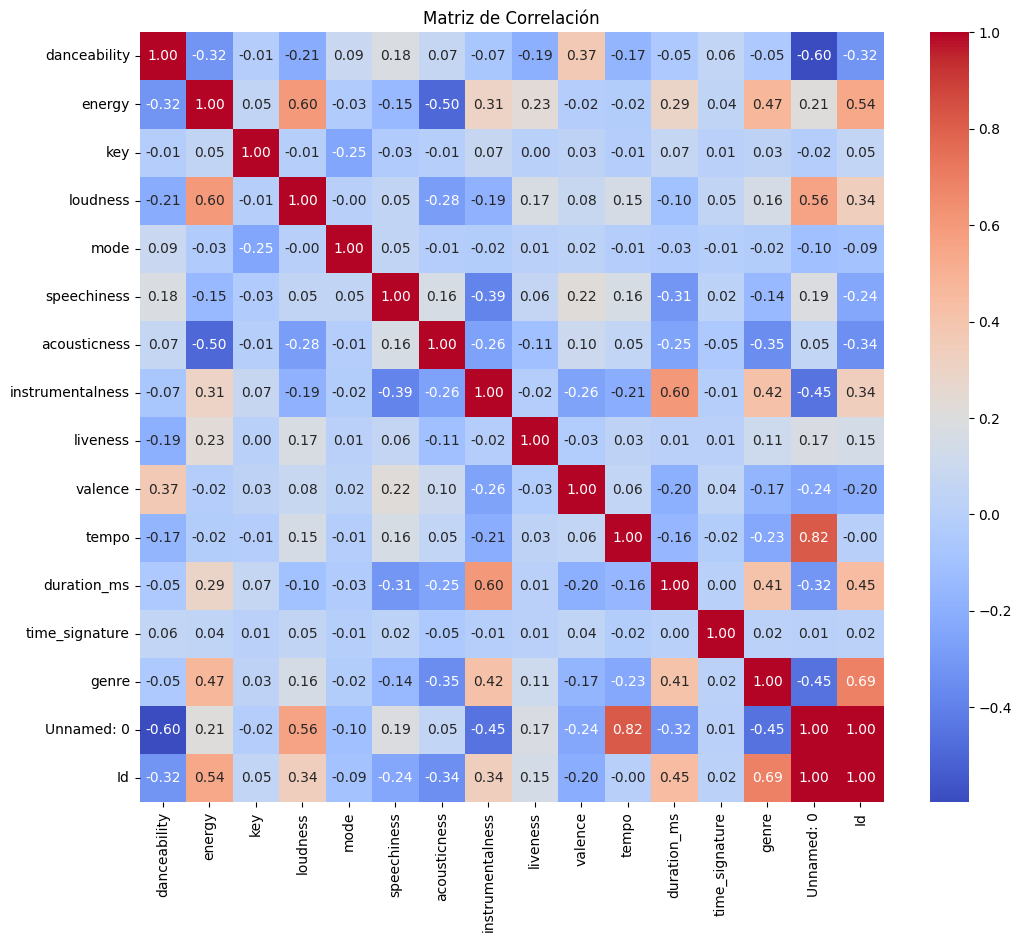

In [14]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

# Eliminar columnas categorcas irrelevantes para la correlación
df_encoded = df.drop(columns=['id', 'type', 'uri', 'track_href', 'analysis_url', 'song_name', 'title'])

# Codificar columnas relevantes
label_encoder = LabelEncoder()

# Codificar 'genre'
df_encoded['genre'] = label_encoder.fit_transform(df_encoded['genre'])

# Calcular la matriz de correlación
correlation_matrix = df_encoded.corr()

# Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()